#### CS164 Pre-Class Work for Session 10.2

### LMIs and Semidefinite Programming
_Yoav Rabinovich, Mar 2020_

----------

_A university has decided to construct a grassy (elliptical) oval in an area bounded by existing buildings. Unfortunately, the area is not itself elliptical. The available land area is bounded by a quadrilateral with vertices (0,0), (0,100), (150,150) and (300,0), where all distances are in metres. Determine the dimensions of the largest elliptical garden that will fit in the space bounded by these vertices, in terms of its center and its semi-major and semi-minor axes._

**Objective function**: The volume of an ellipse is proportional to the determinant of its characteristic matrix $Q$. Since we require $Q$ to be positive semi-definite, we can use the concave function $\log \det Q$ as a maximization objective.

**Constraints**: To be inscribed in a polyhedron, all points in the ellipse must satisfy $a_i^T x \leq b_i, i = 1,...,m$ for $m$ linear constraints. If substitute into $x$ the form of an ellipse, we see that the ellipse must satisfy $|| Q a_i || + a_i^T c <= b_i, i = 1,...,m$.

In [0]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [0]:
# Define the vertices
vert_x = 100*np.array([0,0,1.5,3,0])
vert_y = 100*np.array([0,1,1.5,0,0])

# Define the lines for the boundary of the oval

A = np.array([[-1 , 0], [0 , -1], [-1/3 , 1], [1, 1]])
b = 100*np.array([[0,0,1,3]]).T

# Define the variables for the ellipse {c + Ex}

c = cp.Variable((2,1))
E = cp.Variable((2,2), PSD = True)

# Define the objective function
obj = cp.Maximize(cp.log_det(E))

# Define the constraints
con = [A[j]*c + cp.norm(A[j]*E,2) <= b[j] for j in range(0,len(b))]

# Solve the optimization problem
prob = cp.Problem(obj,con)
prob.solve()

8.857946242481223

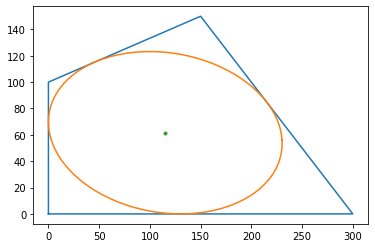

In [0]:
plt.figure()
plt.plot(vert_x,vert_y)
# Create ellipse
points = np.arange(0,101)*2*np.pi/100
e_points = (np.kron(c.value,np.ones([1,101])) +  E.value @ [np.cos(points),np.sin(points)])
plt.plot(e_points[0].T,e_points[1].T)
plt.plot(c.value[0],c.value[1],'.')
evalue,evec = np.linalg.eigvals(E.value)

plt.show()